## SBI CLAIM DETECTOR

## Importing the Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates

# for modelling
import sklearn
import imblearn


## Reading the Dataset

In [2]:
# let's import the data
data = pd.read_csv('SBI_Life_insurance.csv')

# let's take a look at the data
pd.set_option('display.max_columns', None)
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
# let's check the shape of the dataset

data.shape

#WE HAVE 1338 ROWS AND 8 VARIABLES IN DATASET

(1338, 8)

In [4]:
# let's get the information about the dataset

data.info()
#THERE IS NO NULL VALUES IN DATASET AND ALL COLUMNS ARE IN INT OF FLOAT FORMAT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


## Descriptive Statistics

In [5]:
# let's describe the data
# It will demonstrate the count, mean, std dev, min, max, etc values for the Numerical features present in the data.

data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [6]:
# lets check the correlation
data.corr()

#WE CAN SEE THAT INSURANCE CLAIM HAVE HIGHLY CO-RELATION WITH SMOKER,CHARGE,BMI COLUMN

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


In [7]:
# lets check the covriance
data.cov()

#AGE HAVE HIGH VARIANCE IN DATASET

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,197.401387,-0.146559,9.362337,0.719303,-0.141903,0.033024,5.087480e+04,0.787509
sex,-0.146559,0.250160,0.141435,0.010348,0.015383,0.002536,3.470145e+02,0.007781
bmi,9.362337,0.141435,37.187884,0.093795,0.009233,1.061646,1.464730e+04,1.154753
children,0.719303,0.010348,0.093795,1.453213,0.003734,0.022069,9.926742e+02,-0.243321
smoker,-0.141903,0.015383,0.009233,0.003734,0.162969,-0.000973,3.848667e+03,0.066309
region,0.033024,0.002536,1.061646,0.022069,-0.000973,1.220771,-8.306723e+01,0.011377
charges,50874.802298,347.014469,14647.304426,992.674197,3848.667032,-83.067231,1.466524e+08,1846.817657
insuranceclaim,0.787509,0.007781,1.154753,-0.243321,0.066309,0.011377,1.846818e+03,0.242922


## Data Cleaning

In [8]:
# let's check whether the data has any null values or not.
data.isnull().any()

age               False
sex               False
bmi               False
children          False
smoker            False
region            False
charges           False
insuranceclaim    False
dtype: bool

In [9]:
data.nunique()

age                 47
sex                  2
bmi                548
children             6
smoker               2
region               4
charges           1337
insuranceclaim       2
dtype: int64

## Data Visualizations

**Scatter Plot between Policy annual premium vs total claim amount**

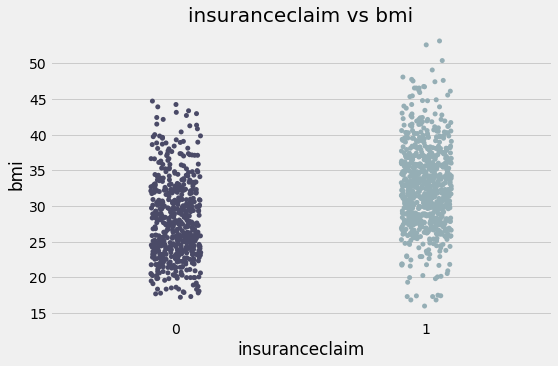

In [10]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(data['insuranceclaim'], data['bmi'], palette = 'bone')
plt.title('insuranceclaim vs bmi', fontsize = 20)
plt.show()

CONCLUSION :
    Where BMI is high there chance for insurance claim is high

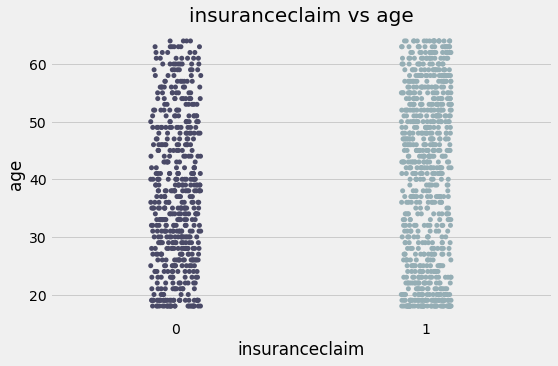

In [11]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(data['insuranceclaim'], data['age'], palette = 'bone')
plt.title('insuranceclaim vs age', fontsize = 20)
plt.show()

CONCLUSION:
    
    there is not much changes in both cases but in higher age it have slight more chances for insurance claim.

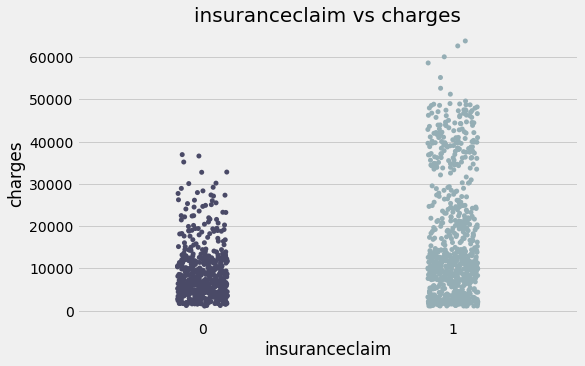

In [12]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,5)

sns.stripplot(data['insuranceclaim'], data['charges'], palette = 'bone')
plt.title('insuranceclaim vs charges', fontsize = 20)
plt.show()

Conclusion:
    
    clearly visulise that if annual medical charges is high than it hav higher chances for claim and it is an important factor in target variable.

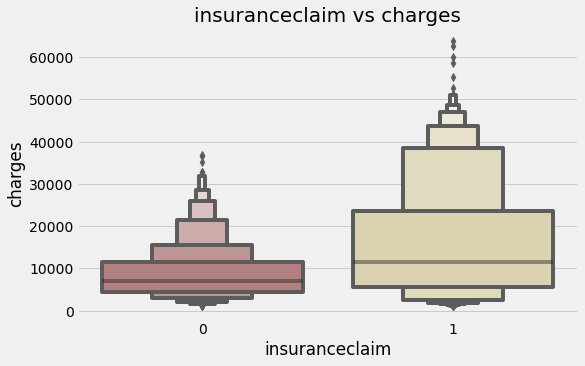

In [13]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,5)

sns.boxenplot(data['insuranceclaim'], data['charges'], palette = 'pink')
plt.title('insuranceclaim vs charges', fontsize = 20)
plt.show()

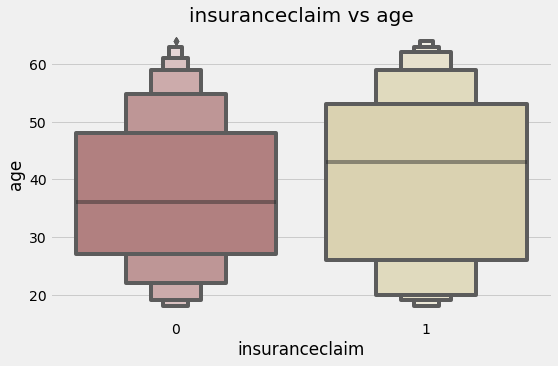

In [14]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,5)

sns.boxenplot(data['insuranceclaim'], data['age'], palette = 'pink')
plt.title('insuranceclaim vs age', fontsize = 20)
plt.show()

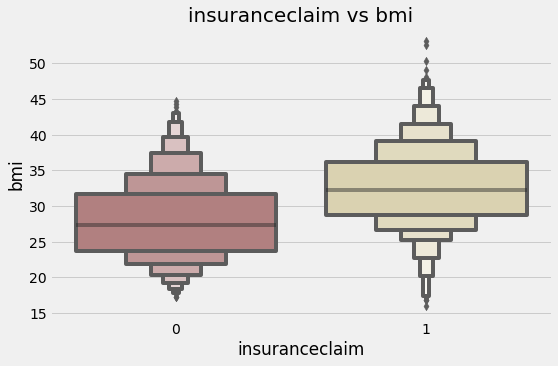

In [15]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,5)

sns.boxenplot(data['insuranceclaim'], data['bmi'], palette = 'pink')
plt.title('insuranceclaim vs bmi', fontsize = 20)
plt.show()

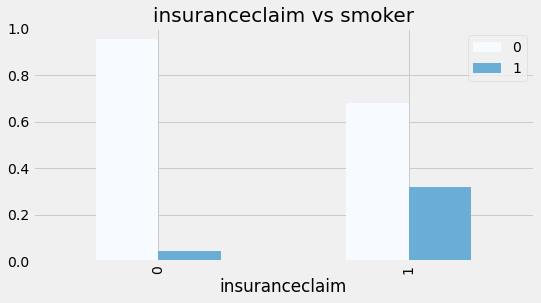

In [16]:
incident = pd.crosstab(data['insuranceclaim'], data['smoker'])
colors = plt.cm.Blues(np.linspace(0, 1, 3))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (8,4),
                                                           color = colors)

plt.title('insuranceclaim vs smoker', fontsize = 20)
plt.legend()
plt.show()

conclusion:
    
    in claimed data, 35% customer are smoker while in un-claimed, it is near 5-8%. so we can say that person who smoking have higher chances for claim.

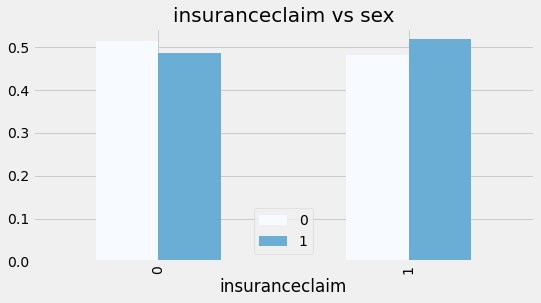

In [17]:
incident = pd.crosstab(data['insuranceclaim'], data['sex'])
colors = plt.cm.Blues(np.linspace(0, 1, 3))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (8,4),
                                                           color = colors)

plt.title('insuranceclaim vs sex', fontsize = 20)
plt.legend()
plt.show()

conclusion:
    in both cases, it have nearly same difference which is negligible

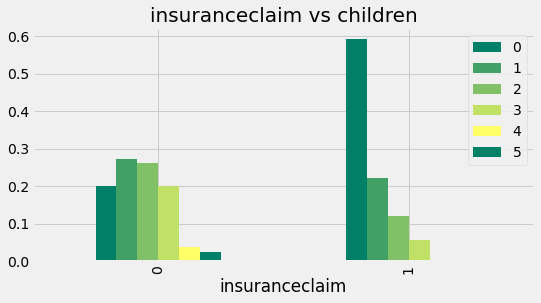

In [18]:

incident = pd.crosstab(data['insuranceclaim'], data['children'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (8, 4),
                                                           color = colors)

plt.title('insuranceclaim vs children', fontsize = 20)
plt.legend()
plt.show()

conclusion:
    claim chances are higher in single person while it is low where person have 2 or more children.

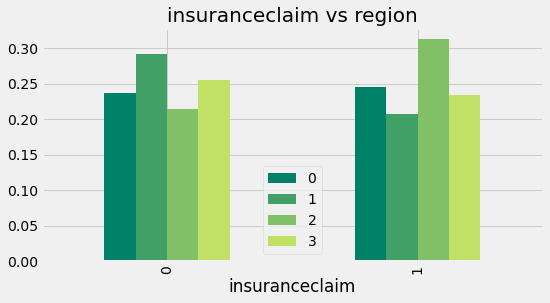

In [19]:

incident = pd.crosstab(data['insuranceclaim'], data['region'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (8, 4),
                                                           color = colors)

plt.title('insuranceclaim vs region', fontsize = 20)
plt.legend()
plt.show()

conclusion:
    
    Region is not important factor in claim as per visulisation

In [20]:
data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [21]:
print('average age when insurance claimed', data.loc[(data['insuranceclaim'] == 1), 'age'].mean())
print('average age when insurance not claimed', data.loc[(data['insuranceclaim'] == 0), 'age'].mean())

print('average bmi when insurance claimed', data.loc[(data['insuranceclaim'] == 1), 'bmi'].mean())
print('average bmi when insurance not claimed', data.loc[(data['insuranceclaim'] == 0), 'bmi'].mean())

print('average charges when insurance claimed', data.loc[(data['insuranceclaim'] == 1), 'charges'].mean())
print('average charges when insurance not claimed', data.loc[(data['insuranceclaim'] == 0), 'charges'].mean())

average age when insurance claimed 40.55172413793103
average age when insurance not claimed 37.30990990990991
average bmi when insurance claimed 32.63517879948914
average bmi when insurance not claimed 27.881585585585576
average charges when insurance claimed 16423.928276537663
average charges when insurance not claimed 8821.421892306294


In [22]:
sex_vs_claim = data.dropna().groupby(['insuranceclaim', 'sex']).apply(lambda data: round(data['sex'].count(), 0))
sex_vs_claim

insuranceclaim  sex
0               0      285
                1      270
1               0      377
                1      406
dtype: int64

In [23]:
children_vs_claim = data.dropna().groupby(['insuranceclaim', 'children']).apply(lambda data: round(data['children'].count(), 0))
children_vs_claim

insuranceclaim  children
0               0           111
                1           151
                2           146
                3           112
                4            21
                5            14
1               0           463
                1           173
                2            94
                3            45
                4             4
                5             4
dtype: int64

In [24]:
smoker_vs_claim = data.dropna().groupby(['insuranceclaim', 'smoker']).apply(lambda data: round(data['smoker'].count(), 0))
smoker_vs_claim

insuranceclaim  smoker
0               0         530
                1          25
1               0         534
                1         249
dtype: int64

In [25]:
region_vs_claim = data.dropna().groupby(['insuranceclaim', 'region']).apply(lambda data: round(data['region'].count(), 0))
region_vs_claim

insuranceclaim  region
0               0         132
                1         162
                2         119
                3         142
1               0         192
                1         163
                2         245
                3         183
dtype: int64

In [26]:
# let's check the correlation of authorities_contacted with the target

data[['children','insuranceclaim']].groupby(['children'], 
                    as_index = False).mean().sort_values(by = 'insuranceclaim', ascending = False)

,children,insuranceclaim
0,0,0.806620
1,1,0.533951
2,2,0.391667
3,3,0.286624
5,5,0.222222
4,4,0.160000


In [27]:
# let's check the correlation of authorities_contacted with the target

data[['region','insuranceclaim']].groupby(['region'], 
                    as_index = False).mean().sort_values(by = 'insuranceclaim', ascending = False)

,region,insuranceclaim
2,2,0.673077
0,0,0.592593
3,3,0.563077
1,1,0.501538


In [28]:
data1 = data.loc[data['insuranceclaim'] == 1]
data2= data.loc[data['insuranceclaim'] == 0]

Text(0.5, 1.0, 'Male/Female Frequency')

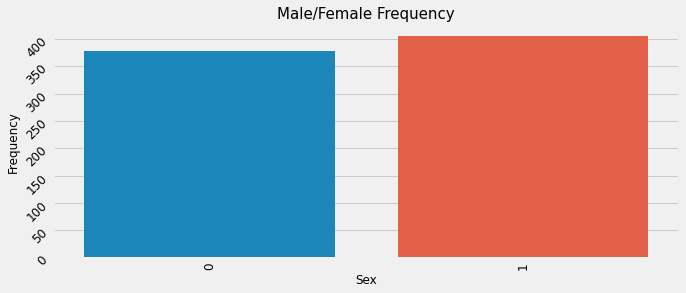

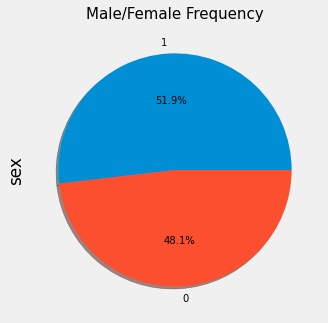

In [29]:
fig, ax = plt.subplots(1,figsize=(10,4))
sns.countplot(x="sex",data=data1) #plotting histogram
plt.title("Male/Female Frequency",fontsize=15)
plt.xlabel("Sex",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
fig, ax = plt.subplots(1,figsize=(5,5))
data1["sex"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={'fontsize': 10}) 
plt.title("Male/Female Frequency",fontsize=15)

in claimed data, ratio of male/female is 52/48 so we can say that sex is not much important in claim

Text(0.5, 1.0, 'children Frequency')

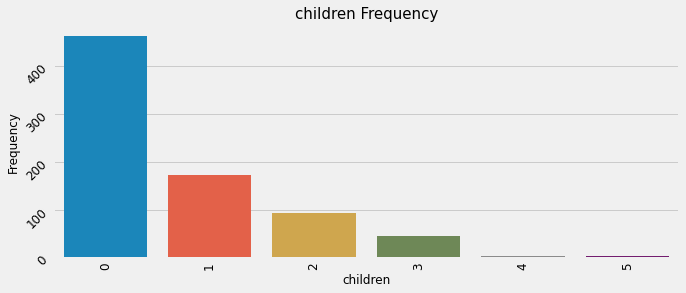

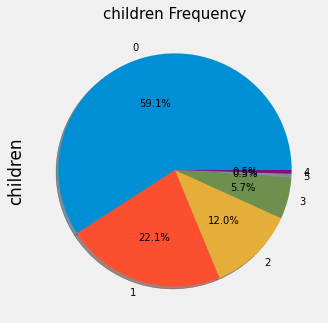

In [30]:
fig, ax = plt.subplots(1,figsize=(10,4))
sns.countplot(x="children",data=data1) #plotting histogram
plt.title("children Frequency",fontsize=15)
plt.xlabel("children",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
fig, ax = plt.subplots(1,figsize=(5,5))
data1["children"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={'fontsize': 10}) 
plt.title("children Frequency",fontsize=15)

in claimed data,59% are single or who have 0 child.
22% have 1 child and 12% have 2 child

Text(0.5, 1.0, 'smoker Frequency')

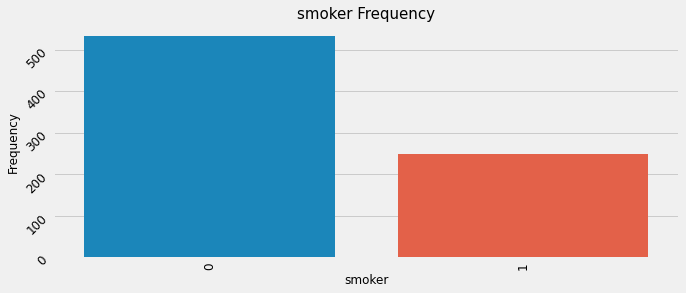

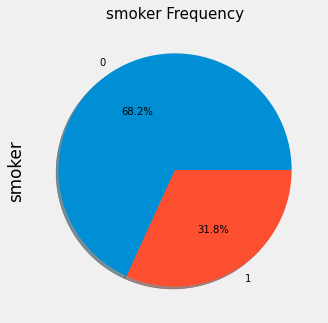

In [31]:
fig, ax = plt.subplots(1,figsize=(10,4))
sns.countplot(x="smoker",data=data1) #plotting histogram
plt.title("smoker Frequency",fontsize=15)
plt.xlabel("smoker",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
fig, ax = plt.subplots(1,figsize=(5,5))
data1["smoker"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={'fontsize': 10}) 
plt.title("smoker Frequency",fontsize=15)

32% are smoker in claimed data so we can say that smoking is important features in target.

Text(0.5, 1.0, 'region Frequency')

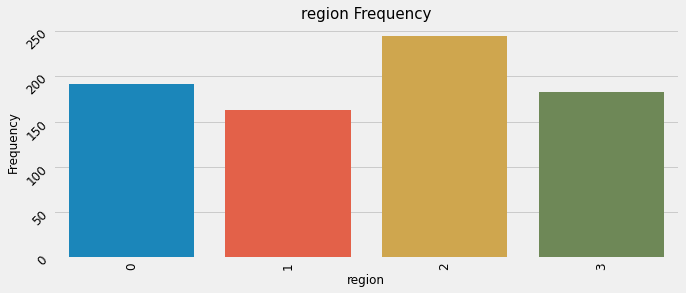

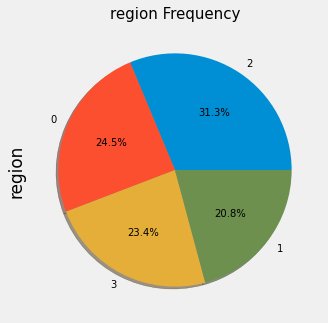

In [32]:
fig, ax = plt.subplots(1,figsize=(10,4))
sns.countplot(x="region",data=data1) #plotting histogram
plt.title("region Frequency",fontsize=15)
plt.xlabel("region",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
fig, ax = plt.subplots(1,figsize=(5,5))
data1["region"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={'fontsize': 10}) 
plt.title("region Frequency",fontsize=15)

as per visulisation, region is not metter in claim

Text(0.5, 1.0, 'Male/Female Frequency')

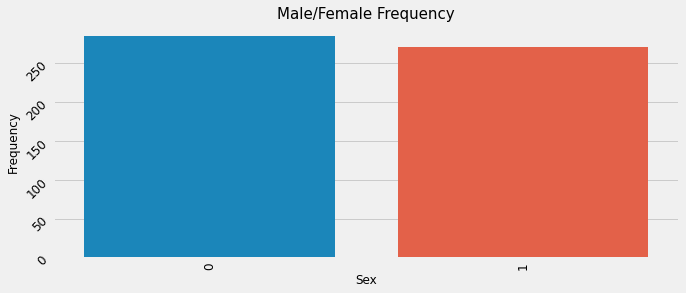

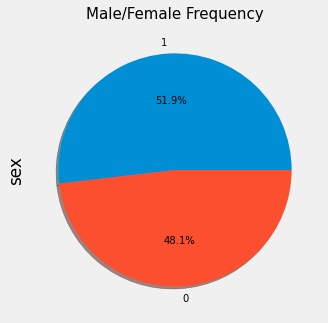

In [33]:
fig, ax = plt.subplots(1,figsize=(10,4))
sns.countplot(x="sex",data=data2) #plotting histogram
plt.title("Male/Female Frequency",fontsize=15)
plt.xlabel("Sex",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
fig, ax = plt.subplots(1,figsize=(5,5))
data1["sex"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={'fontsize': 10}) 
plt.title("Male/Female Frequency",fontsize=15)

Text(0.5, 1.0, 'children Frequency')

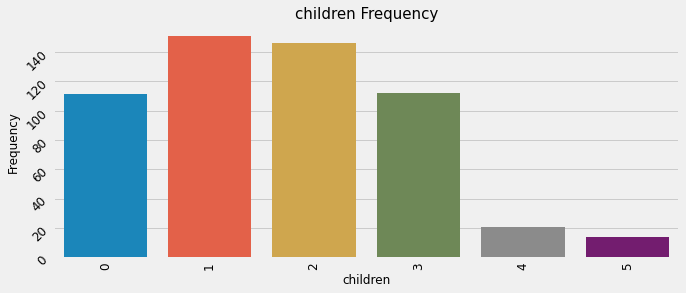

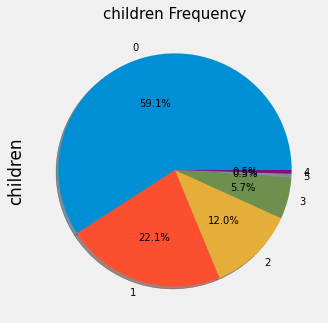

In [34]:
fig, ax = plt.subplots(1,figsize=(10,4))
sns.countplot(x="children",data=data2) #plotting histogram
plt.title("children Frequency",fontsize=15)
plt.xlabel("children",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
fig, ax = plt.subplots(1,figsize=(5,5))
data1["children"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={'fontsize': 10}) 
plt.title("children Frequency",fontsize=15)

Text(0.5, 1.0, 'smoker Frequency')

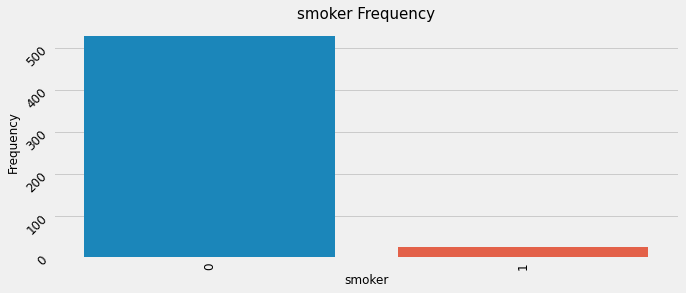

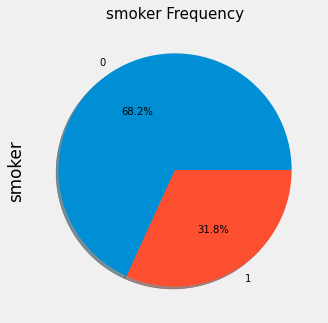

In [35]:
fig, ax = plt.subplots(1,figsize=(10,4))
sns.countplot(x="smoker",data=data2) #plotting histogram
plt.title("smoker Frequency",fontsize=15)
plt.xlabel("smoker",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
fig, ax = plt.subplots(1,figsize=(5,5))
data1["smoker"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={'fontsize': 10}) 
plt.title("smoker Frequency",fontsize=15)

Text(0.5, 1.0, 'region Frequency')

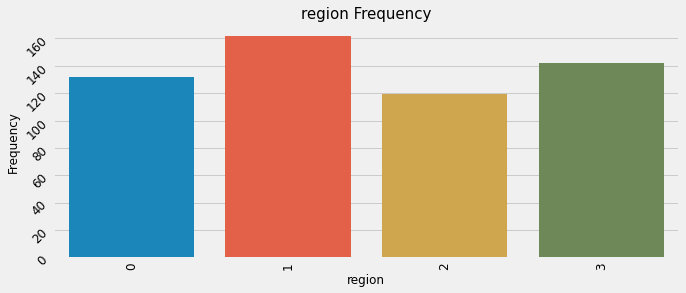

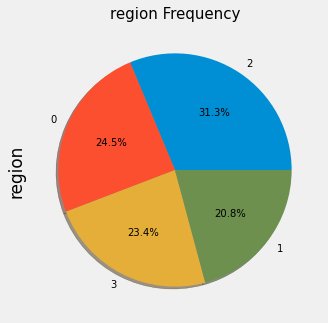

In [36]:
fig, ax = plt.subplots(1,figsize=(10,4))
sns.countplot(x="region",data=data2) #plotting histogram
plt.title("region Frequency",fontsize=15)
plt.xlabel("region",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
fig, ax = plt.subplots(1,figsize=(5,5))
data1["region"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={'fontsize': 10}) 
plt.title("region Frequency",fontsize=15)

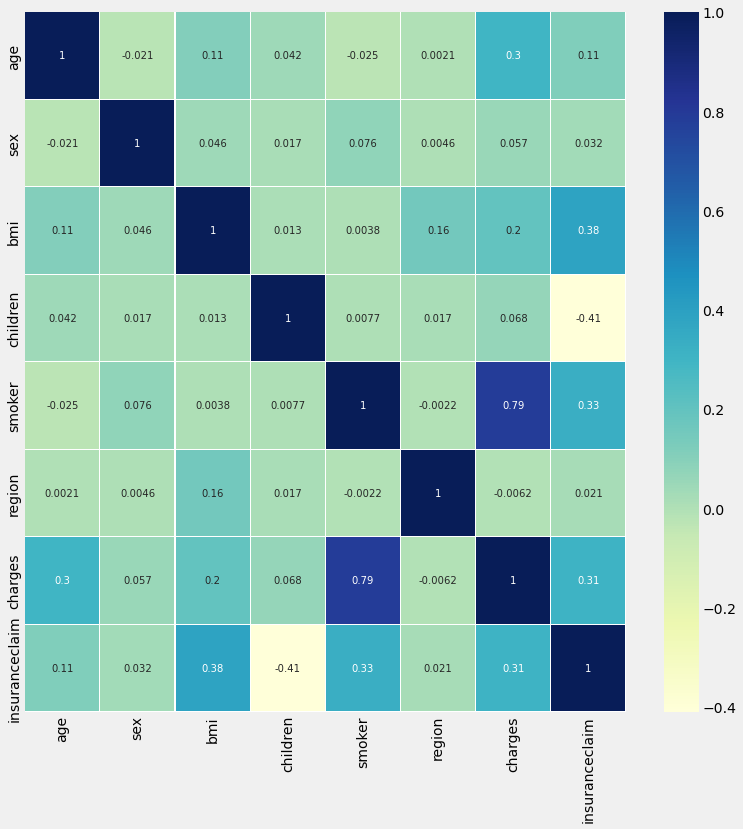

In [37]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, annot=True, cmap="YlGnBu", linewidths=0.1, annot_kws={"fontsize":10});

EDA CONCLUSION:
    
    1) as charges increase, chances for claim is also increase.
    2) high bmi leads to higher claim chances
    3) smoking habit leads to higher claim chances
    4) region and sex doesn't metter in claim
    5) as no of child is low, higher chances for claim

In [38]:
data = data.drop(['region','sex'], axis = 1)

In [39]:
data

,age,bmi,children,smoker,charges,insuranceclaim
0,19,27.900,0,1,16884.92400,1
1,18,33.770,1,0,1725.55230,1
2,28,33.000,3,0,4449.46200,0
3,33,22.705,0,0,21984.47061,0
4,32,28.880,0,0,3866.85520,1
...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,0
1334,18,31.920,0,0,2205.98080,1
1335,18,36.850,0,0,1629.83350,1
1336,21,25.800,0,0,2007.94500,0


OUTLIERS REMOVEL

In [40]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(data)
print(data.shape)
df=data.loc[(z_score<3).all(axis=1)]
print(df.shape)

(1338, 6)
(1309, 6)


SKEWNESS REMOVEL

In [41]:
df.skew()

age               0.051340
bmi               0.191432
children          0.738119
smoker            1.482731
charges           1.437160
insuranceclaim   -0.352569
dtype: float64

In [42]:
from scipy.stats import boxcox
for col in df:
    if df[col].skew()>=.50:
        df[col]=np.cbrt(df[col]) ## For Right skewed data we use log,square root,cube root transformation


In [43]:
df.skew()

age               0.051340
bmi               0.191432
children         -0.101389
smoker            1.482731
charges           0.481700
insuranceclaim   -0.352569
dtype: float64

In [96]:
# let's split the data into dependent and independent sets

x = df.drop(['insuranceclaim'], axis = 1)
y = df['insuranceclaim']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1309, 5)
Shape of y : (1309,)


In [97]:
claim = df[df['insuranceclaim']==1]
no_claim = df[df['insuranceclaim']==0]

claim.shape, no_claim.shape

((768, 6), (541, 6))

BALANCING DATASET

In [98]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(sampling_strategy='auto')
x,y = nm.fit_sample(x,y)

In [99]:
x.shape, y.shape

((1082, 5), (1082,))

SCALEDOWN DATA

In [100]:
from sklearn.preprocessing import StandardScaler 
STD=StandardScaler()
x=STD.fit_transform(x)

In [101]:
# let's split the dataset into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (865, 5)
Shape of x_test : (217, 5)
Shape of y_train : (865,)
Shape of y_test : (217,)


FEATURE SELECTION

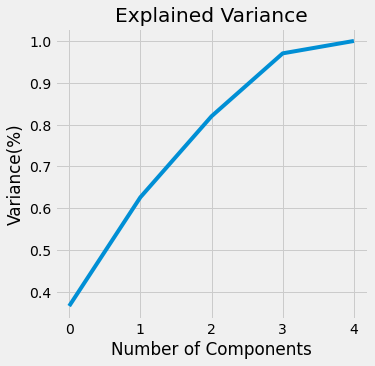

In [102]:
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()

## Modelling with Ensemble of Samplers

In [103]:
from sklearn.linear_model import LogisticRegression #models to perform on data
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lg=LogisticRegression()
svc=SVC()
rndf = RandomForestClassifier()
dtc=DecisionTreeClassifier()
gb=GaussianNB()
knn=KNeighborsClassifier()
sgdc = SGDClassifier()

In [104]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)
    
    
    plt.rcParams['figure.figsize'] = (5, 5)
    cm = confusion_matrix(y_test,pred)
    sns.heatmap(cm, annot = True, cmap = 'copper')
    plt.show()

Accuracy Score 84.33179723502305
Confusion Matrix
 [[ 82  11]
 [ 23 101]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        93
           1       0.90      0.81      0.86       124

    accuracy                           0.84       217
   macro avg       0.84      0.85      0.84       217
weighted avg       0.85      0.84      0.84       217

F1 score 85.59322033898306


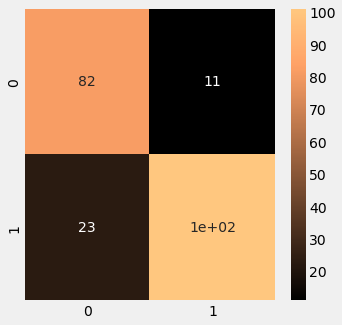

In [105]:
fun(lg)

Accuracy Score 88.94009216589862
Confusion Matrix
 [[ 92   1]
 [ 23 101]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.99      0.88        93
           1       0.99      0.81      0.89       124

    accuracy                           0.89       217
   macro avg       0.90      0.90      0.89       217
weighted avg       0.91      0.89      0.89       217

F1 score 89.38053097345134


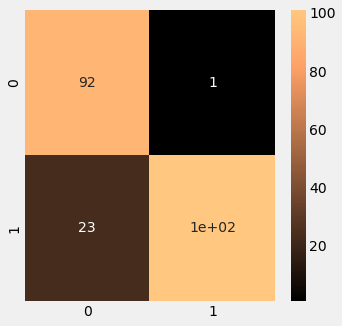

In [106]:
fun(svc)

Accuracy Score 94.93087557603687
Confusion Matrix
 [[ 86   7]
 [  4 120]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        93
           1       0.94      0.97      0.96       124

    accuracy                           0.95       217
   macro avg       0.95      0.95      0.95       217
weighted avg       0.95      0.95      0.95       217

F1 score 95.61752988047807


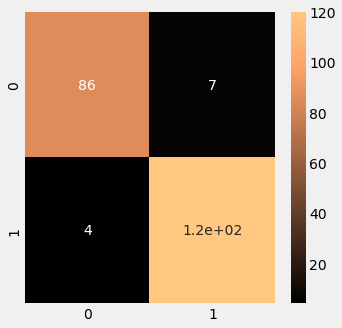

In [107]:
fun(dtc)

Accuracy Score 80.64516129032258
Confusion Matrix
 [[86  7]
 [35 89]]
Classification Report
               precision    recall  f1-score   support

           0       0.71      0.92      0.80        93
           1       0.93      0.72      0.81       124

    accuracy                           0.81       217
   macro avg       0.82      0.82      0.81       217
weighted avg       0.83      0.81      0.81       217

F1 score 80.90909090909089


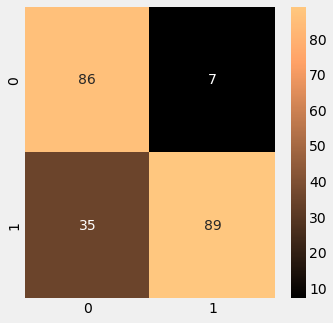

In [108]:
fun(gb)

Accuracy Score 91.24423963133641
Confusion Matrix
 [[ 85   8]
 [ 11 113]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        93
           1       0.93      0.91      0.92       124

    accuracy                           0.91       217
   macro avg       0.91      0.91      0.91       217
weighted avg       0.91      0.91      0.91       217

F1 score 92.24489795918367


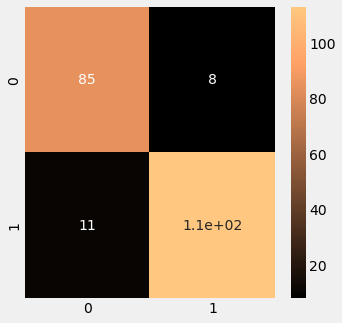

In [109]:
fun(knn)

Accuracy Score 81.10599078341014
Confusion Matrix
 [[78 15]
 [26 98]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.84      0.79        93
           1       0.87      0.79      0.83       124

    accuracy                           0.81       217
   macro avg       0.81      0.81      0.81       217
weighted avg       0.82      0.81      0.81       217

F1 score 82.70042194092827


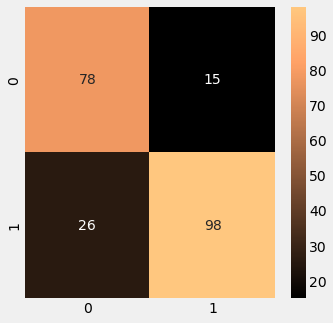

In [110]:
fun(sgdc)

Accuracy Score 96.31336405529954
Confusion Matrix
 [[ 89   4]
 [  4 120]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        93
           1       0.97      0.97      0.97       124

    accuracy                           0.96       217
   macro avg       0.96      0.96      0.96       217
weighted avg       0.96      0.96      0.96       217

F1 score 96.7741935483871


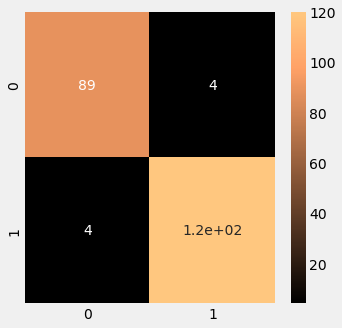

In [111]:
fun(rndf)
pred=rndf.predict(x_test)

In [112]:
gd=GradientBoostingClassifier()
ad=AdaBoostClassifier()

Accuracy Score 86.63594470046083
Confusion Matrix
 [[ 82  11]
 [ 18 106]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        93
           1       0.91      0.85      0.88       124

    accuracy                           0.87       217
   macro avg       0.86      0.87      0.86       217
weighted avg       0.87      0.87      0.87       217

F1 score 87.96680497925311


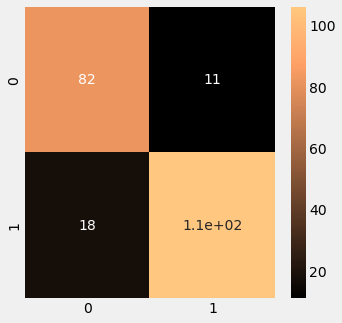

In [113]:
fun(ad)
pred=ad.predict(x_test)

Accuracy Score 96.31336405529954
Confusion Matrix
 [[ 90   3]
 [  5 119]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        93
           1       0.98      0.96      0.97       124

    accuracy                           0.96       217
   macro avg       0.96      0.96      0.96       217
weighted avg       0.96      0.96      0.96       217

F1 score 96.74796747967478


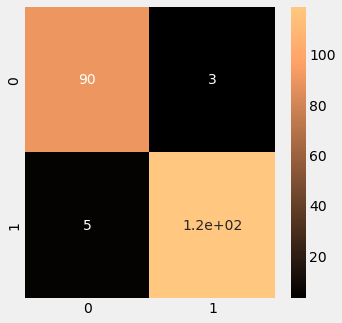

In [114]:
fun(gd)
pred=gd.predict(x_test)

In [115]:
score=cross_val_score(svc,x,y,cv=5)
print("score of cross validation score for svc", score.mean()*100)
score=cross_val_score(dtc,x,y,cv=5)
print("score of cross validation score for Decisiontreeclassifier",score.mean()*100)
score=cross_val_score(knn,x,y,cv=5)
print("score of cross validation score for knn",score.mean()*100)
score=cross_val_score(gb,x,y,cv=5)
print("score of cross validation score for GausianNB classifier",score.mean()*100)
score=cross_val_score(rndf,x,y,cv=4)
print("score of cross validation score for Randomforest classifier",score.mean()*100)
score=cross_val_score(ad,x,y,cv=4)
print('score of cross validation score for Adaboost classifier',score.mean()*100)
score=cross_val_score(gd,x,y,cv=4)
print("score of cross validation score for Gradientboost classifier",score.mean()*100)

score of cross validation score for svc 87.07501280081924
score of cross validation score for Decisiontreeclassifier 95.93787335722818
score of cross validation score for knn 89.75166410650282
score of cross validation score for GausianNB classifier 77.6531831370541
score of cross validation score for Randomforest classifier 91.78146781467815
score of cross validation score for Adaboost classifier 82.81467814678147
score of cross validation score for Gradientboost classifier 93.44540112067787


In [117]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [118]:
grid_param = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,40,3),
    'min_samples_leaf' : range(1,20,2),
    'min_samples_split' : range(2,30,2),
    'splitter' : ['best','random']
}


grid_search = GridSearchCV(estimator = dtc,
                     param_grid = grid_param,
                     cv = 5,
                     n_jobs =-1)

grid_search.fit(x_train,y_train)


best_parameters = grid_search.best_params_
print(best_parameters)

grid_search.best_score_

{'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


0.9734104046242773

In [119]:
dtc1 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 14, min_samples_leaf= 3, min_samples_split= 2, splitter= 'best')
dtc1.fit(x_train,y_train)

dtc1.score(x_test,y_test)

0.9493087557603687

In [120]:
gd1 = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

grid_search = GridSearchCV(estimator = gd1,
                     param_grid = parameters,
                     cv = 5,
                     n_jobs =-1)

grid_search.fit(x_train,y_train)


best_parameters = grid_search.best_params_
print(best_parameters)


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}


In [121]:
gd1 = GradientBoostingClassifier(n_estimators= 500, max_depth= 10, learning_rate= 0.1)
gd1.fit(x_train,y_train)

gd1.score(x_test,y_test)

0.9585253456221198

In [122]:
p2={'n_estimators':[10,50,100,250,500],'max_depth':[1,2,3,4,5],'max_features':['auto','sqrt','log2']}
rf1=GridSearchCV(rndf,p2)
rf1.fit(x,y)
print(rf1.best_params_)

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


Accuracy Score 93.54838709677419
Confusion Matrix
 [[ 88   5]
 [  9 115]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        93
           1       0.96      0.93      0.94       124

    accuracy                           0.94       217
   macro avg       0.93      0.94      0.93       217
weighted avg       0.94      0.94      0.94       217

F1 score 94.26229508196722


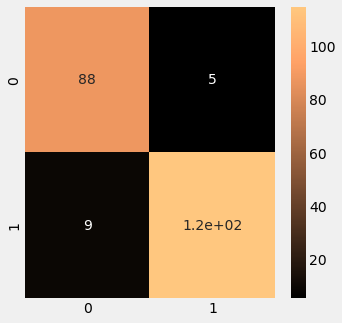

In [123]:
rndf1=RandomForestClassifier(max_depth=100,max_features='auto',n_estimators=10)
fun(rndf1)

In [124]:
score=cross_val_score(dtc1,x,y,cv=4)
print("score of cross validation score for DecisonTreeclassifier",score.mean()*100)
score=cross_val_score(gd1,x,y,cv=4)
print('score of cross validation score for GradientBoostingClassifier',score.mean()*100)
score=cross_val_score(rndf1,x,y,cv=4)
print("score of cross validation score for RandomForestClassifier",score.mean()*100)

score of cross validation score for DecisonTreeclassifier 97.13475468088014
score of cross validation score for GradientBoostingClassifier 97.78221948886156
score of cross validation score for RandomForestClassifier 89.8435151018177


In [125]:
estimator=[]

estimator.append(('rndf1',RandomForestClassifier()))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator.append(('gd1',GradientBoostingClassifier()))

In [126]:
voting_hard=VotingClassifier(estimators=estimator,voting='hard')
voting_hard.fit(x_train,y_train)
y_pred=voting_hard.predict(x_test)
print(y_pred)
#usint accuracy score
score=(accuracy_score(y_test,y_pred))
print('hard voting score % d'%score)

[0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0
 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0]
hard voting score  0


In [127]:
y_pred_prob=gd1.predict_proba(x_test)[:,1]
y_pred_prob

array([8.98780888e-23, 1.34082353e-22, 8.98780888e-23, 2.59782660e-22,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 8.98780888e-23, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 8.98780888e-23, 1.00000000e+00,
       7.40515067e-05, 1.00000000e+00, 8.98780888e-23, 8.98780888e-23,
       8.98780888e-23, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.48183917e-22,
       1.00000000e+00, 8.98780888e-23, 9.93306500e-23, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 8.98780888e-23, 1.00000000e+00,
       1.00000000e+00, 8.98780888e-23, 1.00000000e+00, 8.98780888e-23,
       8.98780888e-23, 8.98780888e-23, 1.00000000e+00, 1.34082353e-22,
       1.00000000e+00, 1.00000000e+00, 1.68525423e-22, 1.97458556e-17,
      

In [128]:
fpr,tpr,thresolds=roc_curve(y_test,y_pred_prob)
print('ROC Score',roc_auc_score(y_test,pred))

ROC Score 0.963709677419355


### WE CONSIDER GRADIENTBOOSTING CLASSIFIER WITH HYPER PARAMETER TUNING AS A BEST FIT  MEDEL:
    
    ACCURACY: 97.5%
    AUC :96.37%

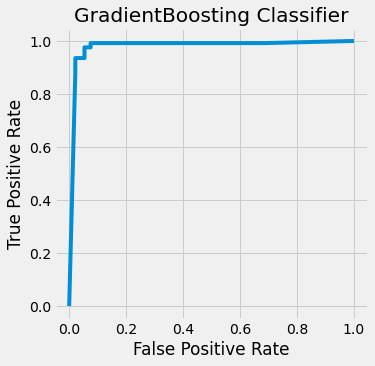

In [129]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GradientBoosting Classifier')
plt.show()

In [130]:
import pickle
filename='SBI_CLAIM_DETECTION.pkl'
pickle.dump(gd1,open(filename,'wb'))